In [1]:
from getpass import getpass
from dl import authClient as ac, queryClient as qc
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")

In [2]:
# defn columns to get by group
ids = "m.id1 as ls_id, m.id2 as sdss_specobjid, pp.objid as sdss_bestobjid, ls.type" 
ras_decs = "ls.ra as ls_ra, so.ra as so_ra, pp.ra as pp_ra, ls.dec as la_dec, so.dec as so_dec, pp.dec as pp_dec"
ls_mags = "ls.dered_mag_g as ls_dered_g, ls.dered_mag_r as ls_dered_r, ls.dered_mag_w1 as ls_dered_w1, ls.dered_mag_w2 as ls_dered_w2, ls.dered_mag_w3 as ls_dered_w3, ls.dered_mag_w4 as ls_dered_w4, ls.dered_mag_z as ls_dered_z"
sdss_mags = "pp.dered_g as sdss_dered_g, pp.dered_i as sdss_dered_i, pp.dered_r as sdss_dered_r, pp.dered_u as sdss_dered_u, pp.dered_z as sdss_dered_z"
# Change this name? Its technically not r-band, though it is said to be same in every band so...?? 
radii = "ls.shape_r as ls_radius_r, pp.petror50_r as sdss_radius_r_petror50, pp.devrad_r as sdss_radius_r_devaucouleurs, pp.exprad_r as sdss_radius_r_exprad" 
shapes = "ls.shape_e1 as ls_ellipticity_component_1, ls.shape_e2 as ls_ellipticity_component_2"
sersic = "ls.sersic"
chi_squareds = "ls.dchisq_3 as ls_dchisq_dev, ls.dchisq_4 as ls_dchisq_exp, ls.rchisq_r as ls_rchisq_r"


columns = ids + ", " + ras_decs + ", " + ls_mags + ", "  + sdss_mags + ", "  + shapes + ", "  + sersic + ", "  + radii + ", " + chi_squareds

query = "\
   SELECT " + columns + " \
     FROM ls_dr9.x1p5__tractor__sdss_dr17__specobj m \
LEFT JOIN ls_dr9.tractor ls       ON ls.ls_id = m.id1 \
LEFT JOIN sdss_dr17.specobj so    ON so.specobjid = m.id2 \
LEFT JOIN sdss_dr17.photoplate pp ON pp.objid = so.bestobjid \
    WHERE ls.shape_r > 0 \
      AND pp.objid IS NOT NULL"
result = qc.query(sql=query,fmt='pandas')
print("Types: {}".format(result.type.unique()))

In [ ]:
result.to_csv('ls_sdss_data.csv')

Or just keep the offline data

In [ ]:
result = pd.read_csv('ls_sdss_data.csv')

In [ ]:
df_sdss_ls = result[["ls_id", "sdss_specobjid", "type", "ls_dered_g", "sdss_dered_g", "ls_dered_r", "sdss_dered_r", "ls_dered_z", "sdss_dered_z", "ls_radius_r", "sdss_radius_r_devaucouleurs", "sdss_radius_r_exprad", "sdss_radius_r_petror50", "ls_ellipticity_component_1", "ls_ellipticity_component_2", "ls_dchisq_exp", "ls_rchisq_r", "sersic"]].copy()
df_sdss_ls

,ls_id,sdss_specobjid,type,ls_dered_g,sdss_dered_g,ls_dered_r,sdss_dered_r,ls_dered_z,sdss_dered_z,ls_radius_r,sdss_radius_r_devaucouleurs,sdss_radius_r_exprad,sdss_radius_r_petror50,ls_ellipticity_component_1,ls_ellipticity_component_2,ls_dchisq_exp,ls_rchisq_r,sersic
0,9907740037940626,2885762903162513408,SER,20.081076,16.118681,19.783230,15.517402,19.937246,14.851226,0.796073,3.332161,2.384849,2.608822,0.578584,0.647574,1.664047e+04,12.045345,0.500000
1,9907740082966460,2885751633168328704,SER,19.459026,19.410181,19.790339,19.817741,19.658915,19.432175,0.414306,0.149321,0.209477,0.791799,0.535743,0.046180,8.151481e+04,2.991258,0.500000
2,9907737592206456,3384630569785649152,SER,14.940711,27.416452,14.566302,15.221709,14.450789,12.520858,0.964460,4.408990,3.863970,3.668771,0.024596,0.014252,4.156473e+05,0.250560,3.500000
3,9907740037940639,2885762903162513408,REX,16.182000,16.118681,15.439531,15.517402,14.898368,14.851226,2.080564,3.332161,2.384849,2.608822,0.000000,0.000000,8.891638e+06,43.940968,1.000000
4,9907736174989012,6825445580762011648,SER,19.709635,19.617900,18.135406,18.043180,17.270824,17.022133,2.016557,2.925096,1.578425,1.801549,0.146049,-0.015117,1.227749e+05,1.367272,2.558401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903369,9906622725882600,3169519087613143040,EXP,22.412306,18.240763,20.871399,17.702234,20.061943,17.380054,4.401600,0.070756,0.110301,0.713205,-0.274037,0.702278,2.150247e+03,3.067382,1.000000
2903370,9906622631779885,3169569665148020736,REX,20.113438,15.950514,22.059880,16.182380,21.042320,16.442472,1.364486,0.011654,0.006503,0.616596,0.000000,0.000000,0.000000e+00,7.466906,1.000000
2903371,9907735206758218,3173999326024198144,REX,18.962740,18.388240,18.513435,17.695560,18.337340,17.146406,0.520693,3.632044,2.346596,1.968662,0.000000,0.000000,2.092918e+05,21.085604,1.000000
2903372,9907735420207547,3174065296721864704,REX,19.962454,24.828354,19.438894,19.580580,19.261272,22.717546,0.384775,0.214623,0.302122,0.792716,0.000000,0.000000,5.436606e+04,3.379407,1.000000


## Read Meert data (for SDSS)

In [ ]:
from astropy.io import fits

In [ ]:
with fits.open('/home/abs/Research/Meert_Catalog/meert_et_al_data_tables_v2/UPenn_PhotDec_Models_rband.fits') as data:
    meert_data_models = pd.DataFrame(np.array(data[5].data).byteswap().newbyteorder()) # .fits are all bigendian, pandas / scipy littleendian

with fits.open('/home/abs/Research/Meert_Catalog/meert_et_al_data_tables_v2/UPenn_PhotDec_CAST.fits') as data:
    meert_cast = pd.DataFrame(np.array(data[1].data).byteswap().newbyteorder())

In [ ]:
meert_data = meert_data_models.join(meert_cast, how="left")
meert_data

,m_tot,m_aper,BT,r_tot,ba_tot,BT_aper,xctr_bulge,xctr_bulge_err,yctr_bulge,yctr_bulge_err,m_bulge,m_bulge_err,r_bulge,r_bulge_err,n_bulge,n_bulge_err,ba_bulge,ba_bulge_err,pa_bulge,pa_bulge_err,xctr_disk,xctr_disk_err,yctr_disk,yctr_disk_err,m_disk,m_disk_err,r_disk,r_disk_err,n_disk,n_disk_err,ba_disk,ba_disk_err,pa_disk,pa_disk_err,GalSky,GalSky_err,chi2nu,finalflag,autoflag,pyflag,pyfitflag,galcount,objid,SDSSIAU,badflag,nchild,mode,run,rerun,camCol,field,obj,stripe,startmu,specobjid,plate,mjd,fiberid,ra,dec,z,veldisp,veldispErr,eclass,p_el_debiased,p_cs_debiased,spiral,elliptical,uncertain
0,17.650600,17.650600,0.206601,1.76292,0.319030,0.206601,108.290001,0.08,108.510002,0.06,19.362801,0.094300,1.094500,0.034254,0.3640,0.100600,0.4297,0.0266,-80.027100,2.186500,109.150002,0.12,108.470001,0.05,17.901899,0.0157,3.94879,0.133429,1.0,-999.0,0.3170,0.0049,-87.028603,0.510500,20.794001,0.000189,0.97224,5121,2048,62,0,1,587722952230174996,b'SDSS J154459.28-002830.9',64,0,1,745,40,2,518,276,10,849998,96486454284255232,342,51691,261,236.246994,-0.475264,0.030284,-9999.000000,-9999.0000,0.159350,0.165,0.739,0,0,1
1,17.366800,17.366800,0.050342,2.28314,0.421235,0.050342,125.480003,0.23,127.620003,0.29,20.612000,0.529400,1.559690,1.825920,8.0000,10.923200,0.1985,0.1518,80.139297,9.917300,125.830002,0.05,125.669998,0.04,17.422899,0.0178,3.79389,0.037012,1.0,-999.0,0.3638,0.0052,-63.844799,0.327600,20.794901,0.000151,0.98013,49,4,62,128,2,587722952230175035,b'SDSS J154508.88-003104.8',16,0,1,745,40,2,518,315,10,849998,96486454292643840,342,51691,263,236.287003,-0.518003,0.077923,-9999.000000,-9999.0000,0.054718,0.029,0.937,1,0,0
2,17.007000,17.041000,0.136427,4.11428,0.655647,0.113900,198.350006,0.10,198.220001,0.12,19.169701,0.670100,4.018810,6.081090,8.0000,5.358100,0.6404,0.0909,37.731400,12.856900,198.539993,0.05,198.449997,0.07,17.166201,0.0262,5.54289,0.085254,1.0,-999.0,0.5560,0.0065,2.507200,1.033000,20.795401,0.000113,0.95581,273,131072,62,128,3,587722952230175138,b'SDSS J154522.08-002801.2',64,0,1,745,40,2,518,418,10,849998,96486454296838144,342,51691,264,236.341995,-0.467023,0.160228,-9999.000000,-9999.0000,-0.120854,0.211,0.763,0,0,1
3,16.812901,16.860600,0.094306,2.78745,0.657995,0.061600,139.729996,0.41,140.300003,3.78,19.376499,9.154700,0.009662,0.213365,8.0000,69.632599,0.0790,3.9621,-78.083199,120.174004,139.699997,0.03,140.270004,0.04,16.920401,0.0063,3.54956,0.036813,1.0,-999.0,0.6578,0.0048,10.753600,0.757700,20.795799,0.000151,0.99357,49,67108868,62,384,4,587722952230175145,b'SDSS J154523.99-003553.6',80,0,1,745,40,2,518,425,10,849998,96486454217146368,342,51691,245,236.350006,-0.598237,0.071558,-9999.000000,-9999.0000,-0.043624,0.171,0.787,1,0,0
4,16.662901,16.662901,0.017390,3.02258,0.375526,0.017390,164.800003,3.44,71.169998,4.14,21.062099,36.304501,0.030373,1.599480,7.6605,132.492996,0.0619,4.6199,-44.679401,157.294006,165.289993,0.02,71.150002,0.05,16.681900,0.0059,4.88425,0.040866,1.0,-999.0,0.3742,0.0021,4.659500,0.231400,20.796400,0.000189,1.02316,49,67108868,62,384,5,587722952230175173,b'SDSS J154528.55-003428.0',16,0,1,745,40,2,518,453,10,849998,96486454246506496,342,51691,252,236.369003,-0.574450,0.071975,-9999.000000,-9999.0000,-0.068106,0.019,0.981,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670717,16.365801,16.365801,0.186178,3.24514,0.866366,0.186178,45.299999,0.02,164.429993,0.01,18.191000,0.114300,0.840312,0.120186,2.4168,0.549100,0.2390,0.0183,-76.665802,0.962900,45.230000,0.05,164.399994,0.04,16.589500,0.0051,4.28642,0.045318,1.0,-999.0,0.8574,0.0059,36.675201,2.215200,21.101500,0.000248,0.97097,5121,64,62,0,670718,588848901539627254,b'SDSS J142927.11+010258.9',0,0,1,756,44,6,678,246,10,533284,86353123655811072,306,51637,371,217.363007,1.049700,0.086556,131.2

In [ ]:
df = df_sdss_ls.set_index('sdss_specobjid').join(meert_data.set_index('specobjid'), how="outer")
df

,ls_id,type,ls_dered_g,sdss_dered_g,ls_dered_r,sdss_dered_r,ls_dered_z,sdss_dered_z,ls_radius_r,sdss_radius_r_devaucouleurs,sdss_radius_r_exprad,sdss_radius_r_petror50,ls_ellipticity_component_1,ls_ellipticity_component_2,ls_dchisq_exp,ls_rchisq_r,sersic,m_tot,m_aper,BT,r_tot,ba_tot,BT_aper,xctr_bulge,xctr_bulge_err,yctr_bulge,yctr_bulge_err,m_bulge,m_bulge_err,r_bulge,r_bulge_err,n_bulge,n_bulge_err,ba_bulge,ba_bulge_err,pa_bulge,pa_bulge_err,xctr_disk,xctr_disk_err,yctr_disk,yctr_disk_err,m_disk,m_disk_err,r_disk,r_disk_err,n_disk,n_disk_err,ba_disk,ba_disk_err,pa_disk,pa_disk_err,GalSky,GalSky_err,chi2nu,finalflag,autoflag,pyflag,pyfitflag,galcount,objid,SDSSIAU,badflag,nchild,mode,run,rerun,camCol,field,obj,stripe,startmu,plate,mjd,fiberid,ra,dec,z,veldisp,veldispErr,eclass,p_el_debiased,p_cs_debiased,spiral,elliptical,uncertain
-9223370539184924672,9.907739e+15,EXP,23.402552,23.069080,22.185595,22.003849,20.512888,19.657207,1.167515,6.212942,2.737851,1.368935,0.302339,-0.149292,1084.9360,0.956435,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-9223368615039576064,9.907739e+15,DEV,20.962042,21.383850,21.089820,21.565111,21.333250,21.312534,0.703672,0.185501,0.268478,0.701693,0.492046,0.270363,7577.6730,1.129279,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-9223368340161669120,9.907739e+15,DEV,24.016426,23.159575,22.215315,21.878736,20.570951,19.363708,0.381816,1.355549,1.286726,-9999.000000,0.053701,-0.284279,2521.2463,0.754787,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-9223367790405855232,9.907739e+15,REX,23.811749,23.718033,21.991530,21.137480,20.662214,19.497309,0.490946,4.747558,3.152891,2.691489,0.000000,0.000000,2024.3094,0.896742,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-9223367240650041344,9.907739e+15,DEV,23.314020,23.830986,21.275269,21.663070,19.684984,19.713850,0.610125,0.642487,0.685036,0.883629,-0.379984,-0.303085,10261.7760,0.912178,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9222519214694488064,9.907739e+15,DEV,23.548565,24.467678,21.584757,21.346811,19.753162,19.351477,0.788906,1.331309,0.984728,1.315084,0.260496,0.193574,7421.2627,0.990539,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9222519764450301952,9.907739e+15,EXP,25.757355,23.531912,22.926744,22.022749,20.926367,19.733482,0.326319,3.717274,0.3256

In [ ]:
specobjs_ls_sdss = df_sdss_ls['sdss_specobjid'].unique()
specobjs_meert = meert_data['specobjid'].unique()
# shared_specobjs = set(specobjs_ls_sdss).intersection(specobjs_meert)
# display(shared_specobjs)
display(specobjs_ls_sdss)
display(specobjs_meert)

array([2885762903162513408, 2885751633168328704, 3384630569785649152, ...,
       3173999326024198144, 3174065296721864704, 3150433764492994560])

array([ 96486454284255232,  96486454292643840,  96486454296838144, ...,
       151938424012537856, 151938423832182784, 275789175066722304])

## Generate new columns
- Ellipticity (b/a) https://www.legacysurvey.org/dr9/catalogs/#ellipticities
- Circularized radius of LS semimajor axes
- Differences in radius measurements (+ percent diff)
- Differences in r-band magnitudes (+ percent diff)

In [ ]:
# Remove plain duplicates 
print("pre-cut: {}".format(df.shape[0]))
df["is_ls_duplicate"] = df.duplicated(subset=['ls_id'], keep=False)
df["is_sdss_duplicate"] = df.duplicated(subset=['sdss_specobjid'], keep=False)
print("post-cut: {}".format(df.shape[0]))

pre-cut: 2903374
post-cut: 2903374


In [ ]:
# Add more radial comparison parameters
df["ls_e"] = np.hypot(df["ls_ellipticity_component_1"], df["ls_ellipticity_component_2"])
df["ls_b_over_a"] = (1 - df["ls_e"]) / (1 + df["ls_e"])

# circularization of ls "radius_r"
df["ls_radius_r_circularized"] = df["ls_radius_r"]*np.sqrt(df["ls_b_over_a"]) # equivalent area radius for given semimajor axis and b/a (r = sqrt(a*b))

# magnitude differences
df["dered_mag_diff"] = df["ls_dered_r"] - df["sdss_dered_r"]
df["dered_percent_diff"] = df["dered_mag_diff"] / df["ls_dered_r"] # again % diff from ls data
df["abs_dered_mag_diff"] = np.abs(df["dered_mag_diff"])

/tmp/ipykernel_22641/1156906810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ls_e"] = np.hypot(df["ls_ellipticity_component_1"], df["ls_ellipticity_component_2"])
/tmp/ipykernel_22641/1156906810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ls_b_over_a"] = (1 - df["ls_e"]) / (1 + df["ls_e"])
/tmp/ipykernel_22641/1156906810.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

## Scrub Data
- Filter out duplicate-match rows (choose closest r-band magnitude)
- Remove data without petrorsian radius measurements (in SDSS this is given by "-9999.0")
- Remove data without r-band magnitudes in either survey (in LS this is "inf")

#### Remove Duplicates

In [ ]:
df.sort_values(['ls_id', 'abs_dered_mag_diff'], ascending=[True, False])
df = df.drop_duplicates(subset=['sdss_specobjid'], keep='first')
print("Length: {}".format(df.shape[0]))

Length: 2866326


In [ ]:
# just checking that we dropped the correct ones
df[df["ls_id"] == 9907740037940626]

,ls_id,sdss_specobjid,type,ls_dered_g,sdss_dered_g,ls_dered_r,sdss_dered_r,ls_dered_z,sdss_dered_z,ls_radius_r,sdss_radius_r_devaucouleurs,sdss_radius_r_exprad,sdss_radius_r_petror50,ls_ellipticity_component_1,ls_ellipticity_component_2,ls_dchisq_exp,ls_rchisq_r,sersic,is_ls_duplicate,is_sdss_duplicate,ls_e,ls_b_over_a,ls_radius_r_circularized,dered_mag_diff,dered_percent_diff,abs_dered_mag_diff
0,9907740037940626,2885762903162513408,SER,20.081076,16.118681,19.78323,15.517402,19.937246,14.851226,0.796073,3.332161,2.384849,2.608822,0.578584,0.647574,16640.467,12.045345,0.5,False,True,0.868396,0.070437,0.211277,4.265828,0.215628,4.265828


In [ ]:
# make sure no duplicates left (should show empty DF)
df_check = df.copy()
df_check["is_sdss_still_duplicated"] = df_check.duplicated(subset=['sdss_specobjid'], keep=False)
df_check[df_check["is_sdss_still_duplicated"] == True]

,ls_id,sdss_specobjid,type,ls_dered_g,sdss_dered_g,ls_dered_r,sdss_dered_r,ls_dered_z,sdss_dered_z,ls_radius_r,sdss_radius_r_devaucouleurs,sdss_radius_r_exprad,sdss_radius_r_petror50,ls_ellipticity_component_1,ls_ellipticity_component_2,ls_dchisq_exp,ls_rchisq_r,sersic,is_ls_duplicate,is_sdss_duplicate,ls_e,ls_b_over_a,ls_radius_r_circularized,dered_mag_diff,dered_percent_diff,abs_dered_mag_diff,is_sdss_still_duplicated


In [ ]:
# no duplicate LS ids :)
df_view_ls_dups = df[df["is_ls_duplicate"] == True]
df_view_ls_dups

,ls_id,sdss_specobjid,type,ls_dered_g,sdss_dered_g,ls_dered_r,sdss_dered_r,ls_dered_z,sdss_dered_z,ls_radius_r,sdss_radius_r_devaucouleurs,sdss_radius_r_exprad,sdss_radius_r_petror50,ls_ellipticity_component_1,ls_ellipticity_component_2,ls_dchisq_exp,ls_rchisq_r,sersic,is_ls_duplicate,is_sdss_duplicate,ls_e,ls_b_over_a,ls_radius_r_circularized,dered_mag_diff,dered_percent_diff,abs_dered_mag_diff


#### Remove no petror_r

In [ ]:
# has petrosian half-light radius
df = df[df["sdss_radius_r_petror50"] > -9000]
print("Length: {}".format(df.shape[0]))

Length: 2853848


#### Remove no r-band magnitude

In [ ]:
df = df[~df["ls_dered_r"].isin([np.inf])]
print("Length: {}".format(df.shape[0]))

Length: 2850572


## Science Filters
- Magnitudes brighter than 21
- Type (everything except PSF, DUP)

In [ ]:
df = df[df["ls_dered_r"] <= 21]
# PSF and DUP already not in joined dataset
# df = df[~df["type"].isin(["PSF", "DUP"])]
print("Length: {}".format(df.shape[0]))

Length: 2313234


In [ ]:
data_no_rex = df[df["type"] != "REX"].copy()

## Compare subsets

In [ ]:
# Sample type in ["DEV", "EXP", "REX", "any"]
# sdss_radius_type in "petror" or "sample" (e.g. "type" for sample DEV would choose sdss_radius_r_devaucouleurs"
# choose circ=True to use circularized radius
def compare_radii(sample_type="DEV", sdss_radius_type="petror", circ=False):
    
    # data set
    if sample_type == "any":
        df_type = df.copy() 
    else: df_type = df[df["type"] == sample_type].copy()
    
    # sdss radius to use  (replace prints with try-catches later)
    if sdss_radius_type == "petror":
        sdss_radius = "sdss_radius_r_petror50"
    elif sdss_radius_type == "sample":
        if sample_type == "DEV":
            sdss_radius = "sdss_radius_r_devaucouleurs"
        elif sample_type == "EXP":
            sdss_radius = "sdss_radius_r_exprad"
        else:
            sdss_radius = "sdss_radius_r_petror50"
            print("type {} has no special radius - defaults petror50 radius".format(sample_type))
    else: 
        print("Invalid radius type. Sample types in ['DEV', 'EXP', 'REX', 'SER', 'any'] sdss_radius_type in ['petror', 'sample']")
    
    # ls radius to use
    ls_radius = "ls_radius_r_circularized" if circ else "ls_radius_r"
        
    # Do it to it
    df_type["radius_diff"] = df_type[sdss_radius] - df_type[ls_radius]
    df_type["radius_diff_percent"] = 100 * df_type["radius_diff"] / df_type[ls_radius]
    # df_type["sdss_radius_type"] = sdss_radius.split("sdss_radius_r_")[1]
    df_type["sdss_radius_type"] = sdss_radius_type
    df_type["circularized"] = "Yes" if circ else "No"
    df_type = df_type[["type", "sdss_radius_type", "circularized", "ls_b_over_a", "radius_diff", "radius_diff_percent", "sersic"]].copy()
    
    return df_type

In [ ]:
plot_data = pd.DataFrame()

for type in ['DEV', 'EXP', 'SER']:
    for sdss_radius_type in ['petror', 'sample']:
        for circ in [True, False]:
            df_type = compare_radii(type, sdss_radius_type, circ)
            plot_data = plot_data.append(df_type)

/tmp/ipykernel_22641/2652724268.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = plot_data.append(df_type)
/tmp/ipykernel_22641/2652724268.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = plot_data.append(df_type)
/tmp/ipykernel_22641/2652724268.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = plot_data.append(df_type)
/tmp/ipykernel_22641/2652724268.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = plot_data.append(df_type)
/tmp/ipykernel_22641/2652724268.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.c

type SER has no special radius - defaults petror50 radius


/tmp/ipykernel_22641/2652724268.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = plot_data.append(df_type)


type SER has no special radius - defaults petror50 radius


/tmp/ipykernel_22641/2652724268.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = plot_data.append(df_type)


In [ ]:
plot_data["column"] = "$r_{SDSS}:$" + plot_data["sdss_radius_type"] + ", " + "$r_{ls}$ circlrzd: " + plot_data["circularized"]

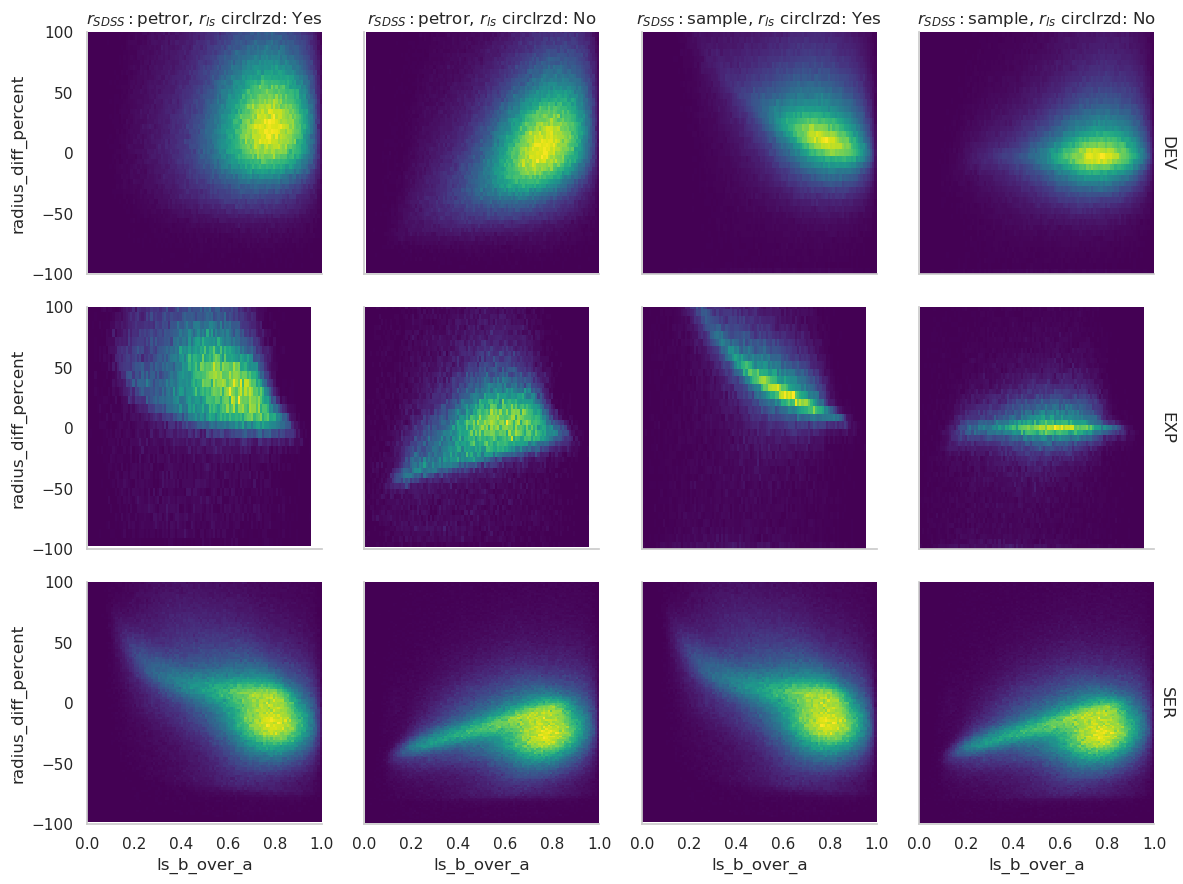

In [ ]:
def hist2d(x, y, **kwargs):
    kwargs.pop("color", None)
    plt.hist2d(x, y, bins=(100,10000), **kwargs)
    plt.ylim(-100,100)
    plt.xlim(0,1)

g = sns.FacetGrid(plot_data, row="type", col="column", margin_titles=True)
g.map(hist2d, "ls_b_over_a", "radius_diff_percent", cmap='viridis')
g.set_titles(col_template="{col_name}", row_template="{row_name}")

## Sersic sub-plots

In [ ]:
sersic_vals = np.arange(0, plot_data['sersic'].max()+0.5, 1)
bin_labels = []
for i in range (0, len(sersic_vals)-1):
    bin_labels.append(str(sersic_vals[i]) + "-" + str(sersic_vals[i+1]))

In [ ]:
sersic_data = compare_radii(sample_type="SER", sdss_radius_type="petror", circ=False)
sersic_data_circ = compare_radii(sample_type="SER", sdss_radius_type="petror", circ=True)

sersic_data

,type,sdss_radius_type,circularized,ls_b_over_a,radius_diff,radius_diff_percent,sersic
0,SER,petror,No,0.070437,1.812749,227.711403,0.500000
1,SER,petror,No,0.300619,0.377493,91.114466,0.500000
2,SER,petror,No,0.944718,2.704311,280.396346,3.500000
4,SER,petror,No,0.743939,-0.215008,-10.662153,2.558401
8,SER,petror,No,0.778018,-0.100939,-5.837215,6.000000
...,...,...,...,...,...,...,...
2903363,SER,petror,No,0.848689,-0.023602,-1.091069,0.789416
2903365,SER,petror,No,0.808536,-0.238726,-15.949619,5.807522
2903366,SER,petror,No,0.835909,-0.275495,-11.054799,1.946557
2903367,SER,petror,No,0.444923,-0.473412,-21.081910,0.500000


In [ ]:
sersic_data['sersic_group'] = (np.select([sersic_data['sersic'].between(i, j, inclusive='right') 
                           for i,j in zip(sersic_vals, sersic_vals[1:])], 
                          bin_labels))
sersic_data_circ['sersic_group'] = (np.select([sersic_data_circ['sersic'].between(i, j, inclusive='right') 
                           for i,j in zip(sersic_vals, sersic_vals[1:])], 
                          bin_labels))
sersic_data = sersic_data.sort_values('sersic_group')
sersic_data_circ = sersic_data_circ.sort_values('sersic_group')

In [ ]:
sersic_data_all = sersic_data_circ.append(sersic_data)


sersic_vals = np.arange(0, plot_data['sersic'].max()+0.5, 2)
bin_labels = []
for i in range (0, len(sersic_vals)-1):
    bin_labels.append(str(sersic_vals[i]) + "-" + str(sersic_vals[i+1]))

sersic_data_all['sersic_group'] = (np.select([sersic_data_all['sersic'].between(i, j, inclusive='right') 
                           for i,j in zip(sersic_vals, sersic_vals[1:])], 
                          bin_labels))

sersic_data_all = sersic_data_all.sort_values('sersic_group')

/tmp/ipykernel_22641/2414480093.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sersic_data_all = sersic_data_circ.append(sersic_data)


Text(0.02, 0.5, '% ($r_{SDSS petro}$  - $r_{LS}$)')

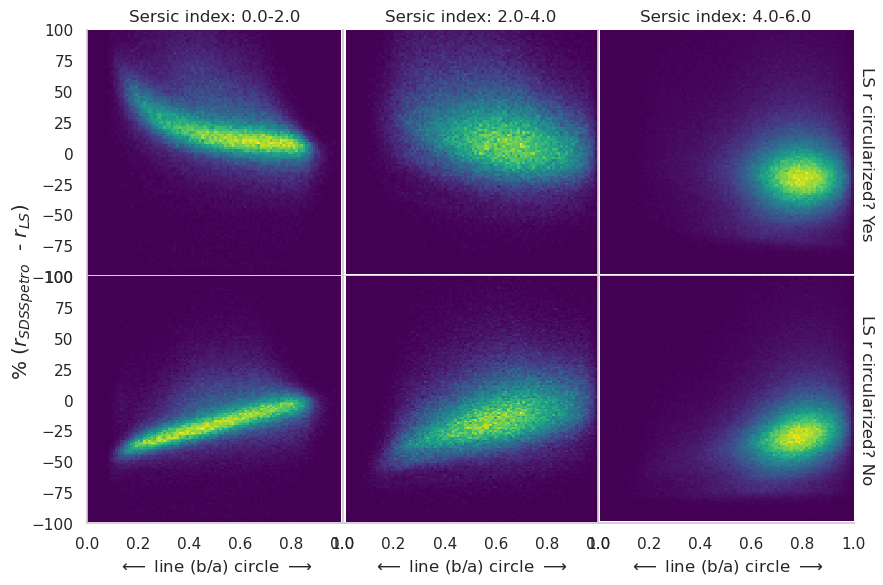

In [ ]:
# https://www.sdss4.org/dr12/algorithms/magnitudes/#mag_petro

def hist2d(x, y, **kwargs):
    kwargs.pop("color", None)
    plt.hist2d(x, y, bins=(100,10000), **kwargs)
    plt.ylim(-100,100)
    plt.xlim(0,1)

g = sns.FacetGrid(sersic_data_all, row="circularized", col="sersic_group", margin_titles=True, gridspec_kws={"wspace":0, "hspace":0})
g.map(hist2d, "ls_b_over_a", "radius_diff_percent", cmap='viridis')
g.set_titles(col_template="Sersic index: {col_name}", row_template="LS r circularized? {row_name}")
g.set_xlabels("$\longleftarrow$ line (b/a) circle $\longrightarrow$")
g.set_ylabels('')
g.fig.supylabel("% ($r_{SDSS petro}$  - $r_{LS}$)")

Text(0.5, 0.01, '$\\longleftarrow$ line             (b/a)              circle $\\longrightarrow$')

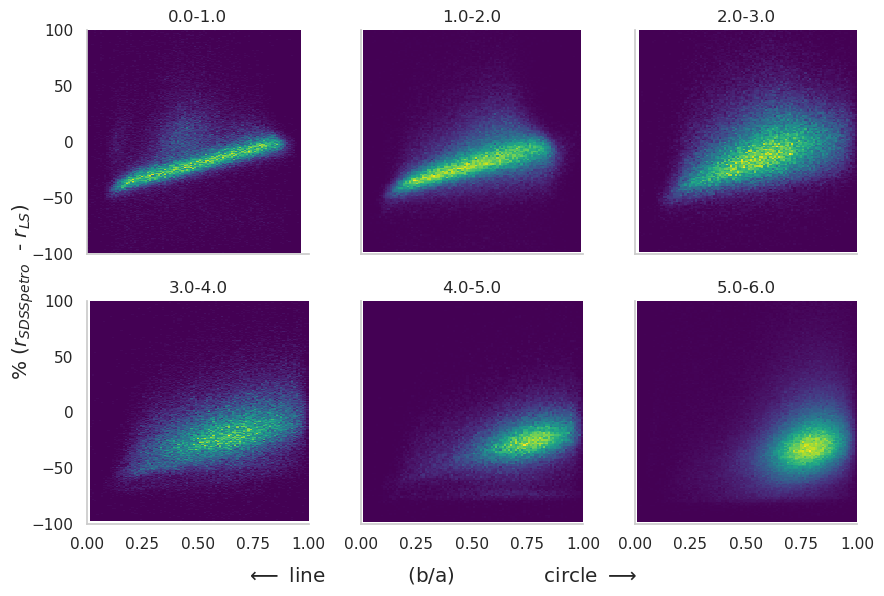

In [ ]:
def hist2d(x, y, **kwargs):
    kwargs.pop("color", None)
    plt.hist2d(x, y, bins=(100,10000), **kwargs)
    plt.ylim(-100,100)
    plt.xlim(0,1)

g = sns.FacetGrid(sersic_data, col="sersic_group", margin_titles=True, col_wrap=3)
g.map(hist2d, "ls_b_over_a", "radius_diff_percent", cmap='viridis')
g.set_titles(col_template="{col_name}")
g.set_xlabels("")
g.set_ylabels('')
g.fig.supylabel("% ($r_{SDSS petro}$  - $r_{LS}$)")
g.fig.supxlabel("$\longleftarrow$ line             (b/a)              circle $\longrightarrow$")

Text(0.5, 0.01, '$\\longleftarrow$ line             (b/a)              circle $\\longrightarrow$')

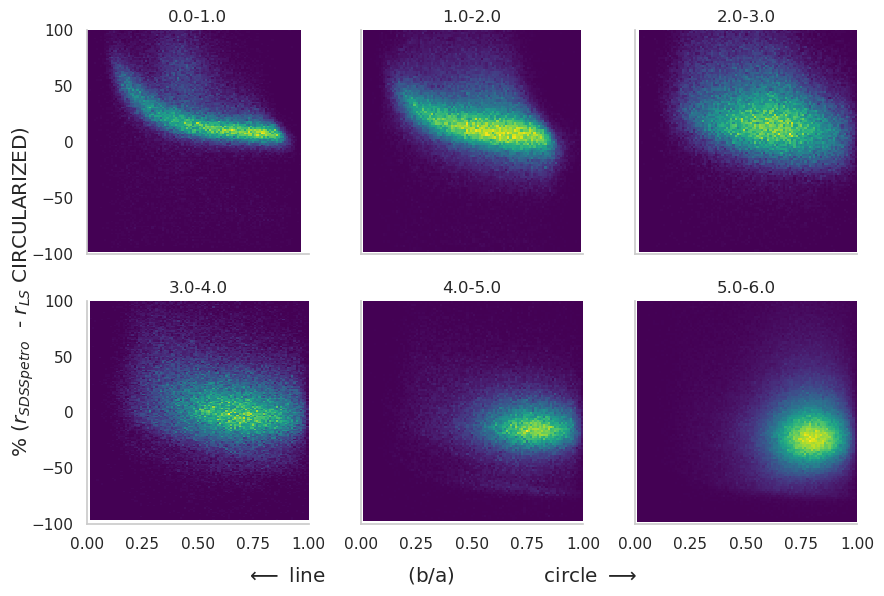

In [ ]:
def hist2d(x, y, **kwargs):
    kwargs.pop("color", None)
    plt.hist2d(x, y, bins=(100,10000), **kwargs)
    plt.ylim(-100,100)
    plt.xlim(0,1)

g = sns.FacetGrid(sersic_data_circ, col="sersic_group", margin_titles=True, col_wrap=3)
g.map(hist2d, "ls_b_over_a", "radius_diff_percent", cmap='viridis')
g.set_titles(col_template="{col_name}")
g.set_xlabels("")
g.set_ylabels('')
g.fig.supylabel("% ($r_{SDSS petro}$  - $r_{LS}$ CIRCULARIZED)")
g.fig.supxlabel("$\longleftarrow$ line             (b/a)              circle $\longrightarrow$")